In [1]:
import argparse  
from code_part1 import foo
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

In [179]:
import math

def getNpArr(data):
    N = len(data)
    tot_data_X = np.random.randn(N, 4)
    tot_data_y = np.random.randn(N, 1)
    for i in range(N):
        if (len(data[i])>1):
            tot_data_y[i][0] = float(data[i][1])
        temp = data[i][0].split('/')
#         tot_data_X[i][0] = (float(temp[0])-6.5)/math.sqrt(143/12) # Normalizing for better convergence
        tot_data_X[i][1] = (float(temp[2])-9.5) # Centering around 0 #Year
        tot_data_X[i][2] = (float(temp[0])-6.5) # centering around 0 #Month
        tot_data_X[i][0] = (float(temp[2]))/31.0 # Getting values roughly from 0 to 1 #Day
        tot_data_X[i][0] = tot_data_X[i][0]+tot_data_X[i][2] #sort of creates a linearity in dates
        tot_data_X[i][3] = (float(temp[2]) - 1)/30.0
        
    return tot_data_X, tot_data_y


df = pd.read_csv("2 Train.csv", header=None)
df = df[1:].sample(n = len(df)-1)
train_data = np.array(df.values)[:100]
dev_data = np.array(df.values)[100:]
train_X, train_y = getNpArr(train_data)
dev_X, dev_y = getNpArr(dev_data)

df = pd.read_csv("2 Test.csv", header=None)
df = df[1:]
test_data = np.array(df.values)
test_X, _ = getNpArr(test_data)

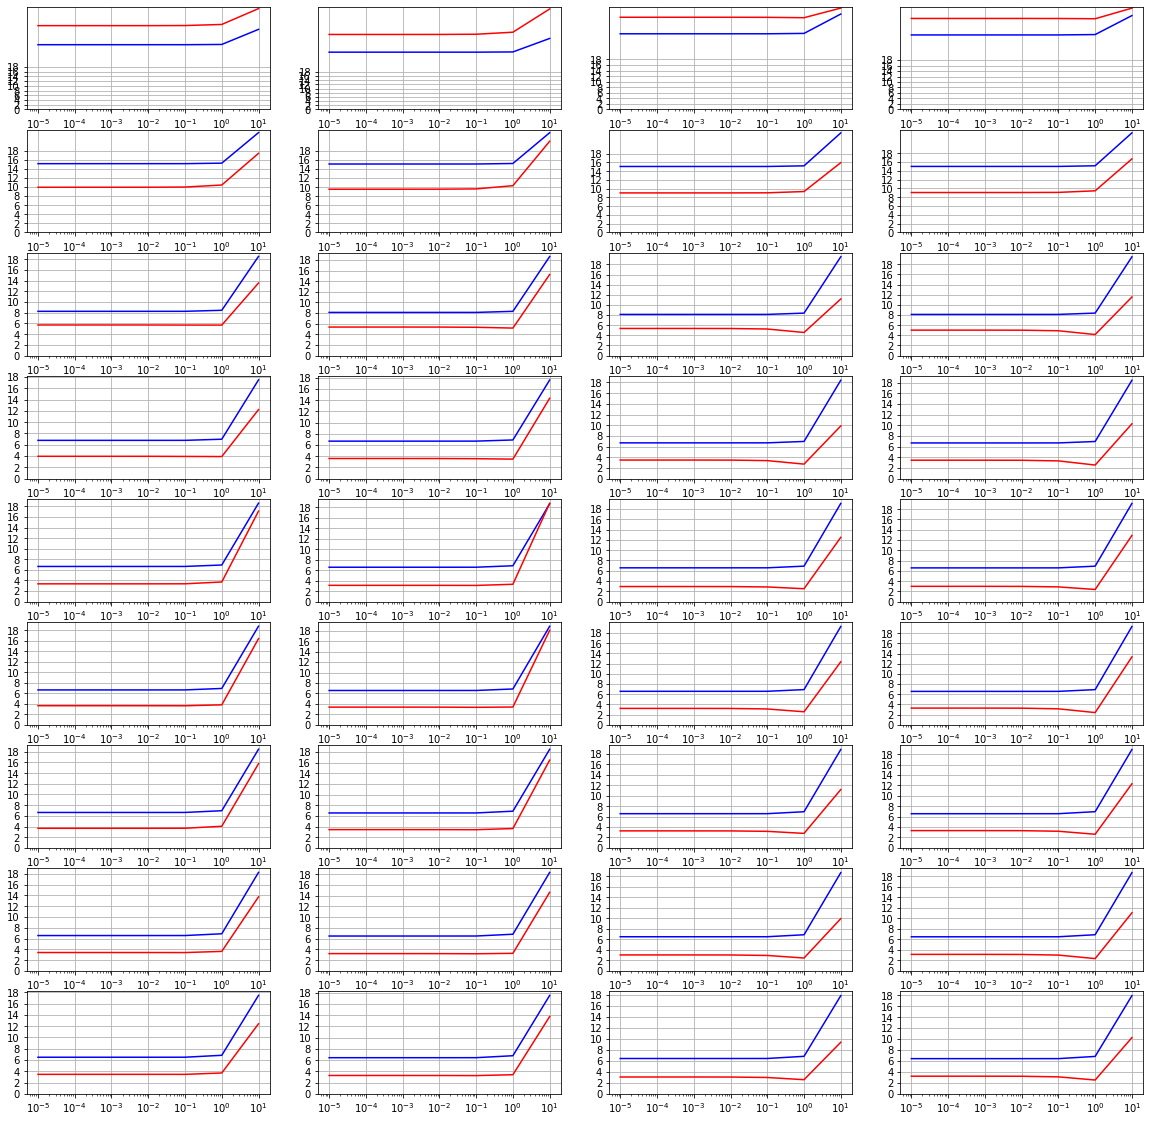

In [180]:
################ ADDED 2 MORE COLUMNS FOR DATE AND MONTH INDI ###################3
####### Changes in extraction, X_fin and eye()

M=np.arange(2, 11, 1) ##DATE
N=np.arange(2, 6, 1) ##YEAR
lmm=np.logspace(-5, 1, num=7)

figure, axes = plt.subplots(nrows=len(M), ncols=len(N), figsize=(20,20))

train_date = train_X[:,0]
train_year = train_X[:,1]
test_date = test_X[:,0]
test_year = test_X[:,1]
dev_date = dev_X[:,0]
dev_year = dev_X[:,1]


X_new_train_year = train_year
temp_X_train_year = train_year

X_new_dev_year = dev_year
temp_X_dev_year = dev_year

X_new_test_year = test_year
temp_X_test_year = test_year

for idxn, n in enumerate(N): ##YEAR
    temp_X_train_year = temp_X_train_year*train_year
    X_new_train_year = np.c_[X_new_train_year, temp_X_train_year]

    temp_X_dev_year = temp_X_dev_year*dev_year
    X_new_dev_year = np.c_[X_new_dev_year, temp_X_dev_year]

    temp_X_test_year = temp_X_test_year*test_year
    X_new_test_year = np.c_[X_new_test_year, temp_X_test_year]

#     X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]    
    
    X_new_train_date = train_date
    temp_X_train_date = train_date
    X_new_dev_date = dev_date
    temp_X_dev_date = dev_date
    X_new_test_date = test_date
    temp_X_test_date = test_date

    
    for idxm, m in enumerate(M): ##DATE
        temp_X_train_date = temp_X_train_date*train_date
        X_new_train_date = np.c_[X_new_train_date, temp_X_train_date]

        temp_X_dev_date = temp_X_dev_date*dev_date
        X_new_dev_date = np.c_[X_new_dev_date, temp_X_dev_date]

        temp_X_test_date = temp_X_test_date*test_date
        X_new_test_date = np.c_[X_new_test_date, temp_X_test_date]

        E_train = []
        E_dev = []
        
        for lamb in lmm:
            X_fin_train = np.c_[np.ones((len(train_X), 1)), X_new_train_year, X_new_train_date, train_X[:,2], train_X[:,3]]    
#             print(X_fin_train.shape)
            X_fin_dev = np.c_[np.ones((len(dev_X), 1)), X_new_dev_year, X_new_dev_date, dev_X[:,2], dev_X[:,3]]    

            X_fin_test = np.c_[np.ones((len(test_X), 1)), X_new_test_year, X_new_test_date, test_X[:,2], test_X[:,3]]    

            theta_best = np.linalg.inv((lamb*np.identity(n+m+3)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(train_y)

            y_hat_train = X_fin_train.dot(theta_best)
            err  = sum((y_hat_train-train_y)**2)
            err/=len(y_hat_train)
#             print("Train error for M=%s: "%(m), math.sqrt(err))
            E_train.append(err)

            y_hat_dev = X_fin_dev.dot(theta_best)
            err  = sum((y_hat_dev-dev_y)**2)
            err/=len(y_hat_dev)
#             print("Test error for M=%s: "%(m), math.sqrt(err))
            E_dev.append(err)
        axes[idxm, idxn].plot(lmm, E_train, color='b')
        axes[idxm, idxn].plot(lmm, E_dev, color='r')
        axes[idxm, idxn].set_xscale("log")
        axes[idxm, idxn].set_xticks(lmm)
        axes[idxm, idxn].set_yticks(np.arange(0,20,2))
        axes[idxm, idxn].grid()

# plt.savefig('part_2dayMonth2_10year2_5.png')
plt.show()

In [185]:

M=np.arange(2, 5, 1) ##DATE
N=np.arange(2, 6, 1) ##YEAR
# lmm=np.logspace(-5, 1, num=7)
lamb = 1

Mm=np.arange(2, 10, 1) ##DATE
Nn=np.arange(2, 10, 1) ##YEAR

# figure, axes = plt.subplots(nrows=len(Mm), ncols=len(Nn), figsize=(20,20))

train_date = train_X[:,0]
train_year = train_X[:,1]
test_date = test_X[:,0]
test_year = test_X[:,1]
dev_date = dev_X[:,0]
dev_year = dev_X[:,1]


X_new_train_year = train_year
temp_X_train_year = train_year
X_new_train_date = train_date
temp_X_train_date = train_date    

X_new_dev_year = dev_year
temp_X_dev_year = dev_year
X_new_dev_date = dev_date
temp_X_dev_date = dev_date

X_new_test_date = test_date
temp_X_test_date = test_date
X_new_test_year = test_year
temp_X_test_year = test_year

for idxn, n in enumerate(N): ##YEAR
    temp_X_train_year = temp_X_train_year*train_year
    mini = np.min(temp_X_train_year)
    maxi = np.max(temp_X_train_year)
    temp_X_train_year = (temp_X_train_year - mini)/(maxi-mini)
    meani = np.mean(temp_X_train_year)
    temp_X_train_year = temp_X_train_year - meani
    X_new_train_year = np.c_[X_new_train_year, temp_X_train_year]

    temp_X_dev_year = temp_X_dev_year*dev_year
    temp_X_dev_year = (temp_X_dev_year-mini)/(maxi-mini) - meani
    X_new_dev_year = np.c_[X_new_dev_year, temp_X_dev_year]

    temp_X_test_year = temp_X_test_year*test_year
    temp_X_test_year = (temp_X_test_year - mini)/(maxi-mini) - meani
    X_new_test_year = np.c_[X_new_test_year, temp_X_test_year]

#     X_fin_train = np.c_[np.ones((len(X_new_train), 1)), X_new_train]    

good_pairs = {}

for idxm, m in enumerate(M): ##DATE
    temp_X_train_date = temp_X_train_date*train_date
    mini = np.min(temp_X_train_date)
    maxi = np.max(temp_X_train_date)
    temp_X_train_date = (temp_X_train_date - mini)/(maxi-mini)
    meani = np.mean(temp_X_train_date)
    X_new_train_date = np.c_[X_new_train_date, temp_X_train_date]

    temp_X_dev_date = temp_X_dev_date*dev_date
    temp_X_dev_date = (temp_X_dev_date-mini)/(maxi-mini) - meani
    X_new_dev_date = np.c_[X_new_dev_date, temp_X_dev_date]

    temp_X_test_date = temp_X_test_date*test_date
    temp_X_test_date = (temp_X_test_date - mini)/(maxi-mini) - meani
    X_new_test_date = np.c_[X_new_test_date, temp_X_test_date]

newc_X_train = train_year*train_date
newc_X_test = test_year*test_date
newc_X_dev = dev_year*dev_date

base_X_train = train_year*train_date
base_X_test = test_year*test_date
base_X_dev = dev_year*dev_date


    
for idxm, mm in enumerate(Mm): #Date
    
    newc_X_train = base_X_train*train_date
    mini = np.min(newc_X_train)
    maxi = np.max(newc_X_train)
    newc_X_train = (newc_X_train - mini)/(maxi-mini)
    meani = np.mean(newc_X_train)
    
    newc_X_test = base_X_test*test_date
    newc_X_test = (newc_X_test-mini)/(maxi-mini) - meani
    newc_X_dev = base_X_dev*dev_date
    newc_X_dev = (newc_X_dev-mini)/(maxi-mini) - meani
    
    base_X_train = newc_X_train
    base_X_test = newc_X_test
    base_X_dev = newc_X_dev
    
    for idxn, nn in enumerate(Nn): #Year
        newc_X_train = newc_X_train*train_year
        mini = np.min(newc_X_train)
        maxi = np.max(newc_X_train)
        newc_X_train = (newc_X_train - mini)/(maxi-mini)
        meani = np.mean(newc_X_train)
        
        newc_X_test = newc_X_test*test_year
        newc_X_test = (newc_X_test-mini)/(maxi-mini) - meani
        newc_X_dev = newc_X_dev*dev_year
        newc_X_dev = (newc_X_dev-mini)/(maxi-mini) - meani

        X_fin_train = np.c_[np.ones((len(train_X), 1)), X_new_train_year, X_new_train_date, newc_X_train, train_X[:,2], train_X[:,3]]    
        X_fin_dev = np.c_[np.ones((len(dev_X), 1)), X_new_dev_year, X_new_dev_date, newc_X_dev, dev_X[:,2], dev_X[:,3]]    
        X_fin_test = np.c_[np.ones((len(test_X), 1)), X_new_test_year, X_new_test_date, newc_X_test, test_X[:,2], test_X[:,3]]    

        theta_best = np.linalg.inv((lamb*np.identity(n+m+4)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(train_y)

        y_hat_train = X_fin_train.dot(theta_best)
        err1 = sum((y_hat_train-train_y)**2)
        err1/=len(y_hat_train)
#         err1 = math.sqrt(err1)
        print("Train error for date pow =%s, year pow =%s: "%(mm, nn), err1)
#         E_train.append(err)

        y_hat_dev = X_fin_dev.dot(theta_best)
        err2 = sum((y_hat_dev-dev_y)**2)
        err2/=len(y_hat_dev)
#         err2 = math.sqrt(err2)
        print("Test error for date pow =%s, year pow =%s: "%(mm, nn), err2)
        
        if (err1<4.6 and err2<4.6):
            good_pairs[(mm, nn)] = (err1, err2)
        
        
        if (mm==7 and nn==9):
            theta_bestest = theta_best
            test_settest = X_fin_test
            
#         E_dev.append(err)
#         axes[idxm, idxn].plot(lmm, E_train, color='b')
#         axes[idxm, idxn].plot(lmm, E_dev, color='r')
#         axes[idxm, idxn].set_xscale("log")
#         axes[idxm, idxn].set_xticks(lmm)
#         axes[idxm, idxn].set_yticks(np.arange(0,20,2))
#         axes[idxm, idxn].grid()

# plt.savefig('part_2dayMonth2_10year2_5.png')
# plt.show()
good_pairs

Train error for date pow =2, year pow =2:  4.364794601296541
Test error for date pow =2, year pow =2:  4.767139724323161
Train error for date pow =2, year pow =3:  4.396617808879263
Test error for date pow =2, year pow =3:  4.827103981220741
Train error for date pow =2, year pow =4:  4.387197360949906
Test error for date pow =2, year pow =4:  4.654107642663065
Train error for date pow =2, year pow =5:  4.394671531684904
Test error for date pow =2, year pow =5:  4.696360318349487
Train error for date pow =2, year pow =6:  4.389678286572253
Test error for date pow =2, year pow =6:  4.632004741327305
Train error for date pow =2, year pow =7:  4.394265985533799
Test error for date pow =2, year pow =7:  4.627708529523827
Train error for date pow =2, year pow =8:  4.389968893223561
Test error for date pow =2, year pow =8:  4.625161162961199
Train error for date pow =2, year pow =9:  4.39350542844439
Test error for date pow =2, year pow =9:  4.601536240638372
Train error for date pow =3, year

{(3, 9): (4.392705356342533, 4.5837765338265255),
 (4, 9): (4.393561931107579, 4.593244281909926),
 (5, 9): (4.393390361773125, 4.587009338020016),
 (6, 9): (4.393523590616703, 4.588575858979894),
 (7, 9): (4.393094859339535, 4.5826120155599686),
 (8, 9): (4.392907651430715, 4.583031253556021),
 (9, 7): (4.394044465736459, 4.599123394924223),
 (9, 9): (4.392401198525007, 4.579624517583766)}

## Convert to submitt-able format

In [186]:
from datetime import datetime
# y_hat_test = model.predict(test_X)
y_hat_test = test_settest.dot(theta_bestest)
# print(y_hat_test)
ff = np.c_[test_data, y_hat_test]
# print(ff)
df = pd.DataFrame(data = ff, columns = ["id", "value"])

now = datetime.now()
k = str(now).split(':')
p = k[0][-2:] + '_' + k[1] + '_' + k[2].split('.')[0]
p=k[0].split('-')[2][:2]+'_'+k[0].split('-')[1]+'_'+p
print(p)
df.to_csv("test_"+p+".csv", index=False)
df.head(10)

27_09_02_04_44


,id,value
0,5/1/10,20.623845
1,4/1/09,20.480926
2,9/1/13,5.822812
3,1/1/06,5.846109
4,2/1/07,13.426106
5,8/1/12,11.374679
6,6/1/14,17.439574
7,3/1/08,18.18981
8,12/1/04,-9.255612
9,7/1/11,15.879563


## Eureka moment

In [222]:
# X_fin_test = np.c_[np.ones((len(test_X), 1)), X_new_test_year, X_new_test_date, newc_X_test, test_X[:,2], test_X[:,3]]    

# theta_best = np.linalg.inv((lamb*np.identity(n+m+4)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(train_y)

# y_hat_train = X_fin_train.dot(theta_best)
# err1 = sum((y_hat_train-train_y)**2)
# err1/=len(y_hat_train)

In [281]:
import datetime

def printem():
    print(train_df_st.head())
    print(dev_df_st.head())
    print(test_df_st.head())
    
def convert2cols(df):

    df['date'] = pd.to_datetime(df['id'])
    df['year'] = pd.DatetimeIndex(df['date']).year
    df['year'] = (df['year'] - 2005.0)/9.0
    df['month'] = pd.DatetimeIndex(df['date']).month
    df['month'] = (df['month']-1.0)/11.0
    df = df.drop("date", axis=1)
    df = df.drop('id', axis=1)
    return df

# printem()
train_df_st = pd.read_csv("2 Train.csv")
train_df_st.columns = ["id", "y"]
train_df_st = train_df_st.sample(n = len(train_df_st))
dev_df_st = train_df_st[100:]
train_df_st = train_df_st[:100]

test_df_st = pd.read_csv("2 Test.csv")
test_df_st = test_df_st


train_df_st = convert2cols(train_df_st)
dev_df_st = convert2cols(dev_df_st)
test_df_st = convert2cols(test_df_st)
printem()

          y      year     month
1    0.9259  0.777778  0.818182
22  -1.3853  1.000000  0.818182
98  24.4186  0.555556  0.272727
53  25.3528  0.000000  0.454545
49   6.2179  0.666667  0.090909
          y      year     month
62  25.3879  0.444444  0.454545
6    5.7535  0.777778  0.727273
19   0.2050  0.333333  0.909091
46   8.9098  0.000000  0.090909
42  24.4780  0.555556  0.454545
       year     month
0  0.555556  0.363636
1  0.444444  0.272727
2  0.888889  0.727273
3  0.111111  0.000000
4  0.222222  0.090909


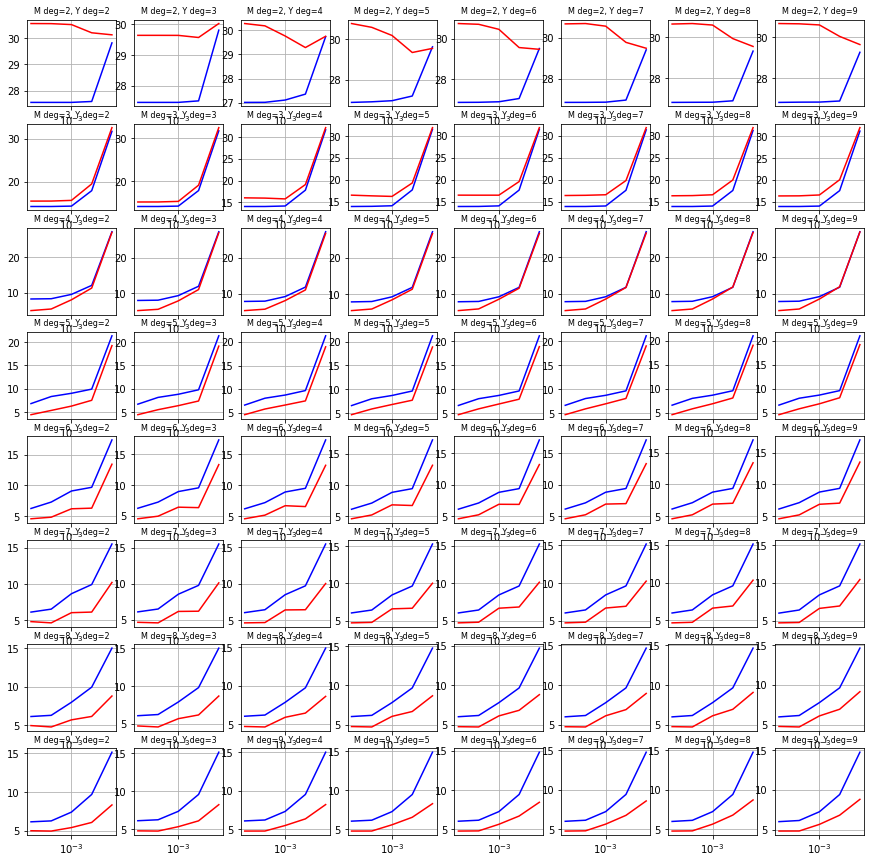

In [283]:
# 05 06 07 08 09
# 10 11 12 13 14
def degcol(df, deg, col):
#     m = deg
    for m in range(2, deg+1):
        nn = col+"^"+str(m)
        df[nn] = df[col]**m
#         df[nn] = df[nn]*(10**(m-1))
        df[nn] = df[nn]
    return df

def returnnp(df):
    y = np.array(df.y.values)
    df = df.drop('y', axis=1)
    X = np.array(df.values)
    X = np.c_[np.ones((len(X), 1)), X]
    return X,y


MONN = np.arange(2, 10)
YEE = np.arange(2, 10)
lambs = [0.00001, 0.0001, 0.001, 0.01, 0.1]
# lambs = np.logspace(-200, -1, num=20)
# lambs = [1e-50, 1e-20, 1e-10, 1e-5, 1e-3]

figure, axes = plt.subplots(ncols=len(MONN), nrows=len(YEE), figsize=(15,15))

for idxy, y_deg in enumerate(YEE):
    
    train_df  = train_df_st.copy()
    test_df = test_df_st.copy()
    dev_df = dev_df_st.copy()
    
    train_df = degcol(train_df, y_deg, "year")
#     test_df = degcol(test_df, y_deg, "year")
    dev_df = degcol(dev_df, y_deg, "year")
    
    for idxm, m_deg in enumerate(MONN):
        
        train_df = degcol(train_df, m_deg, "month")
#         test_df = degcol(test_df, m_deg, "month")
        dev_df = degcol(dev_df, m_deg, "month")
        
        X_fin_train, y_train = returnnp(train_df)
        X_fin_dev, y_dev = returnnp(dev_df)
#         X_fin_test = np.array(test_df.values)
#         X_fin_test = np.c_[np.ones((len(X_fin_test), 1)), X_fin_test]
    
        E_rms_train = []
        E_rms_dev = []
        
        for lamb in lambs:
            
            theta_best = np.linalg.inv((lamb*np.identity(m_deg+y_deg+1)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(y_train)
            y_hat_train = X_fin_train.dot(theta_best)
            temp_val_train = sum((y_hat_train-y_train)**2)
            temp_val_train/=len(y_train)
            E_rms_train.append(temp_val_train)

            y_hat_dev = X_fin_dev.dot(theta_best)
            temp_val_dev = sum((y_hat_dev-y_dev)**2)
            temp_val_dev/=len(y_dev)
            E_rms_dev.append(temp_val_dev) 
        
#         if (m_deg>=4 and y_deg>=6):
        axes[idxm, idxy].set_xscale('log')
        axes[idxm, idxy].plot(lambs, E_rms_train, "b-", label="Training Error")
        axes[idxm, idxy].plot(lambs, E_rms_dev, "r-", label="Test Error")
#         axes[idxm, idxy].set_xticks(lambs)
        axes[idxm, idxy].grid()
        axes[idxm, idxy].set_title(r"M deg=%s, Y deg=%s"%(m_deg, y_deg), fontsize=8)

plt.show()

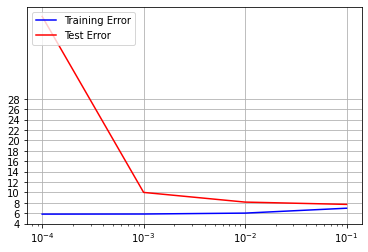

In [274]:
train_df  = train_df_st.copy()
test_df = test_df_st.copy()
dev_df = dev_df_st.copy()

train_df = degcol(train_df, 8, "year")
dev_df = degcol(dev_df, 8, "year")

train_df = degcol(train_df, 5, "month")
dev_df = degcol(dev_df, 5, "month")


X_fin_train, y_train = returnnp(train_df)
X_fin_dev, y_dev = returnnp(dev_df)
E_rms_train = []
E_rms_dev = []
lambs = [0.0001, 0.001, 0.01, 0.1]

for lamb in lambs:

    theta_best = np.linalg.inv((lamb*np.identity(14)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(y_train)
    y_hat_train = X_fin_train.dot(theta_best)
    temp_val_train = sum((y_hat_train-y_train)**2)
    temp_val_train/=len(y_train)
    E_rms_train.append(temp_val_train)

    y_hat_dev = X_fin_dev.dot(theta_best)
    temp_val_dev = sum((y_hat_dev-y_dev)**2)
    temp_val_dev/=len(y_dev)
    E_rms_dev.append(temp_val_dev) 

plt.xscale('log')
plt.xticks(lambs)
plt.yticks(np.arange(0,30,2))
plt.plot(lambs, E_rms_train, "b-", label="Training Error")
plt.plot(lambs, E_rms_dev, "r-", label="Test Error")
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [ ]:
train_df  = train_df_st.copy()
test_df = test_df_st.copy()
dev_df = dev_df_st.copy()

y_deg = 
m_deg = 

train_df = degcol(train_df, 3, "year")
dev_df = degcol(dev_df, 3, "year")

train_df = degcol(train_df, 8, "month")
dev_df = degcol(dev_df, 8, "month")


X_fin_train, y_train = returnnp(train_df)
X_fin_dev, y_dev = returnnp(dev_df)
E_rms_train = []
E_rms_dev = []
lambs = [0.0001, 0.001, 0.01, 0.1]

for lamb in lambs:

    theta_best = np.linalg.inv((lamb*np.identity(14)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(y_train)
    y_hat_train = X_fin_train.dot(theta_best)
    temp_val_train = sum((y_hat_train-y_train)**2)
    temp_val_train/=len(y_train)
    E_rms_train.append(temp_val_train)

    y_hat_dev = X_fin_dev.dot(theta_best)
    temp_val_dev = sum((y_hat_dev-y_dev)**2)
    temp_val_dev/=len(y_dev)
    E_rms_dev.append(temp_val_dev) 

plt.xscale('log')
plt.xticks(lambs)
plt.yticks(np.arange(0,30,2))
plt.plot(lambs, E_rms_train, "b-", label="Training Error")
plt.plot(lambs, E_rms_dev, "r-", label="Test Error")
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [291]:
train_df_st = pd.read_csv("2 Train.csv")
train_df_st.columns = ["id", "y"]
train_df_st = convert2cols(train_df_st)


train_df  = train_df_st.copy()
dev_df = dev_df_st.copy()

train_df = degcol(train_df, 3, "year")
dev_df = degcol(dev_df, 3, "year")

train_df = degcol(train_df, 7, "month")
dev_df = degcol(dev_df, 7, "month")


X_fin_train, y_train = returnnp(train_df)
X_fin_dev, y_dev = returnnp(dev_df)
lamb = 0.0001


theta_best = np.linalg.inv((lamb*np.identity(11)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(y_train)
y_hat_train = X_fin_train.dot(theta_best)
temp_val_train = sum((y_hat_train-y_train)**2)
temp_val_train/=len(y_train)
print(temp_val_train)

y_hat_dev = X_fin_dev.dot(theta_best)
temp_val_dev = sum((y_hat_dev-y_dev)**2)
temp_val_dev/=len(y_dev)
print(temp_val_dev)

6.238919596943559


In [292]:
from datetime import datetime

test_df = test_df_st.copy()

test_df = degcol(test_df, 3, "year")
test_df = degcol(test_df, 7, "month")

test_df = np.array(test_df.values)
test_df = np.c_[np.ones((len(test_df), 1)), test_df]
    

y_hat_test = test_df.dot(theta_best)
temp_test = pd.read_csv("2 Test.csv")

ff = np.c_[temp_test, y_hat_test]
# print(ff)
df = pd.DataFrame(data = ff, columns = ["id", "value"])

now = datetime.now()
k = str(now).split(':')
p = k[0][-2:] + '_' + k[1] + '_' + k[2].split('.')[0]
p=k[0].split('-')[2][:2]+'_'+k[0].split('-')[1]+'_'+p
print(p)
# df.to_csv("test_"+p+".csv", index=False)
df.head(10)

27_09_19_22_43


,id,value
0,5/1/10,25.443475
1,4/1/09,21.775671
2,9/1/13,5.662608
3,1/1/06,2.24901
4,2/1/07,7.807317
5,8/1/12,13.510679
6,6/1/14,23.801387
7,3/1/08,15.200455
8,12/1/04,1.721798
9,7/1/11,20.648067


In [ ]:
# [[26.02924294]
#  [21.60752766]
#  [ 5.2620994 ]
#  [ 3.10440741]
#  [ 6.95043139]
#  [12.93813767]
#  [25.71861073]
#  [14.21984594]
#  [-0.42476115]
#  [20.74296798]]

# 26.59477874
# 21.61488836
# 5.043410222
# 2.650237378
# 7.166089961
# 13.21296573
# 24.87576354
# 14.56326065
# -0.472485798
# 20.89703575

In [ ]:
train_df  = train_df_st.copy()
test_df = test_df_st.copy()
dev_df = dev_df_st.copy()

train_df = degcol(train_df, 3, "year")
dev_df = degcol(dev_df, 3, "year")

train_df = degcol(train_df, 8, "month")
dev_df = degcol(dev_df, 8, "month")


X_fin_train, y_train = returnnp(train_df)
X_fin_dev, y_dev = returnnp(dev_df)
E_rms_train = []
E_rms_dev = []
lamb = 0.0001


theta_best = np.linalg.inv((lamb*np.identity(12)) + X_fin_train.T.dot(X_fin_train)).dot(X_fin_train.T).dot(y_train)
y_hat_train = X_fin_train.dot(theta_best)
temp_val_train = sum((y_hat_train-y_train)**2)
temp_val_train/=len(y_train)
print(temp_val_train)

y_hat_dev = X_fin_dev.dot(theta_best)
temp_val_dev = sum((y_hat_dev-y_dev)**2)
temp_val_dev/=len(y_dev)
E_rms_dev.append(temp_val_dev) 
print(temp_val_dev)